# Rate of change 

In [2]:
SAVE = True 
SAVE_PATH = "../charts/"
DATA_STORE_PATH_BASE = "../store/week1/"
DATA_STORE_PATH_WEEK = "../store/week2/"

In [3]:
EMPTY_CID = "QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn"
MY_PEERID = "12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5xmxuCi"

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def reversed_sort_dict_by_value(dic:dict)-> dict:
    return {key:val for key, val in reversed(sorted(dic.items(), key=lambda item: item[1]))}

def drop_none_unique_peers(df:pd.DataFrame) -> pd.DataFrame:
    df_filtered = df.drop_duplicates(subset=['peer'], keep=False)
    df_filtered = df_filtered[df_filtered["peer"] != MY_PEERID]
    df_filtered = df_filtered.reset_index()
    return df_filtered

def make_peerid_short(df:pd.DataFrame) -> pd.DataFrame:
    df["peer"] = df["peer"].apply(lambda p: p[:3] + '...' + p[-5:])
    return df 

In [6]:
df = pd.read_csv(DATA_STORE_PATH_BASE + "time.csv")
#df = drop_none_unique_peers(df)
print(len(df))
df.head()

36190


,peer,time,cid
0,12D3KooWHsshUtLVTUccPiFdmupxm3fhTgMnnZM76KPfhS...,2023-07-03 09:54:15,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
1,12D3KooWLAGdfENUAm6o7zia5n98VrdwYAMfVFxyxVLAVc...,2023-07-03 09:55:16,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
2,12D3KooWNqmnF2DKywda1JDPaL3Ej6W1cZXF2RSbqcCwEP...,2023-07-03 09:56:20,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
3,12D3KooWCkT234YfDHFvj9wzDzwTwJxe6z35TCe1MfSxTY...,2023-07-03 09:57:40,NONE
4,12D3KooWEja9effvbfwyuf4xVuLLpRL9fFYXG7cTyWnkgt...,2023-07-03 09:57:51,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn


In [7]:
week_df = pd.read_csv(DATA_STORE_PATH_WEEK + "time.csv")
week_df.head()

,peer,time,cid
0,12D3KooWKnxvF2bF9M2YfyGdf8XYCbpoUYJe5qWP8MQfpV...,2023-07-17 05:34:41,QmWZWRpAUjh3PUqED3Ps4aKhdyJGRZEyycgBgrfQLxNEg5...
1,QmSjGmuHCGDDennPzBQy1mjD918NrZ7XfGUfy3YQ7AH8LN,2023-07-17 05:38:47,QmY5jXoexekDfgQBgksr3bNXYamGdqR9hu9gpRZDM2fV5Y
2,12D3KooWFeHu75n14FDrSUDXbb7cXhRUJCYxsRCQLA8nZ9...,2023-07-17 05:39:46,ZCJ7vCLm6VphC9VUMyiWAnfk8eGTBSxd7SZj236r3oWBABVaq
3,12D3KooWKDQ7UkeL9TzTwLty6GuZzEkHdRm8qgcVLiiTZF...,2023-07-17 05:40:51,bafybeia47lwoqxe63utbcy3bgkgspsve34fs2rrrxeuax...
4,12D3KooWHou2VDpmvPUmv1bvuEBUdV6VTauzxAgb8xLUYS...,2023-07-17 05:42:48,bafybeih3eeqy6lnypxh3h5yfi7x7gcryhsf7xkh7h7srt...


In [8]:
from typing import List
def change_cid(init_set:pd.DataFrame, weeks:List[pd.DataFrame]) -> List[int]:
    result:List[int] = [0]
    for week_df in weeks:
        merged_df = pd.merge(init_set, week_df, on='peer')
        merged_df['cid_y'] = merged_df['cid_y'].fillna('NONE')
        unequal_rows = merged_df[merged_df['cid_x'] != merged_df['cid_y']]
        result.append(len(unequal_rows))
    return result




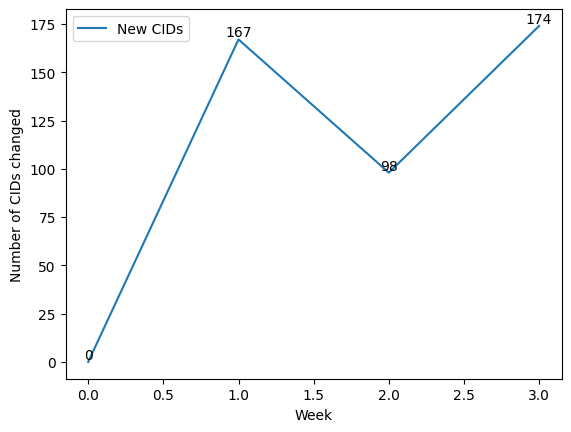

In [9]:
week_files = [f"../store/week{w}/time.csv" for w in range(2,5)]
week_files = [pd.read_csv(w) for w in week_files]

changes_in_peers = change_cid(df,week_files)
pd.DataFrame({"Week":[0,1,2,3],"New CIDs":changes_in_peers}).set_index("Week").plot(ylabel="Number of CIDs changed")
for (xi, yi) in zip([0,1,2,3], changes_in_peers):
    plt.text(xi, yi, yi, va='bottom', ha='center')
if SAVE: 
    plt.savefig(SAVE_PATH+"unequal_cid_over_time.png",bbox_inches='tight')

## different cut of for last week

[0, 167, 98, 170]


<Axes: xlabel='Week', ylabel='Number of CIDs changed'>

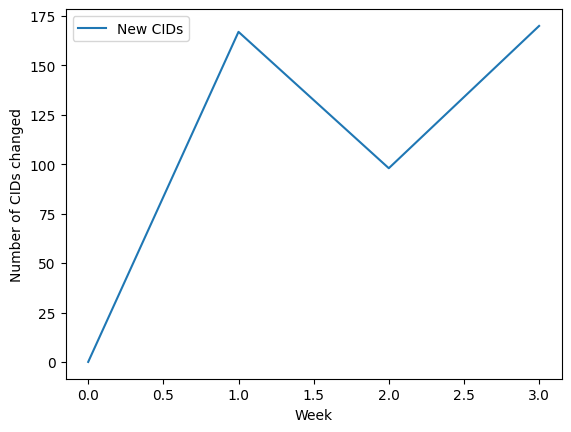

In [10]:
week_files = [f"../store/week{w}/time.csv" for w in range(2,5)]
week_files = [pd.read_csv(w) for w in week_files]
week_files[-1] = week_files[-1][:2441]

changes_in_peers = change_cid(df,week_files)
print(changes_in_peers)
pd.DataFrame({"Week":[0,1,2,3],"New CIDs":changes_in_peers}).set_index("Week").plot(ylabel="Number of CIDs changed")



[333, 166, 235, 163]


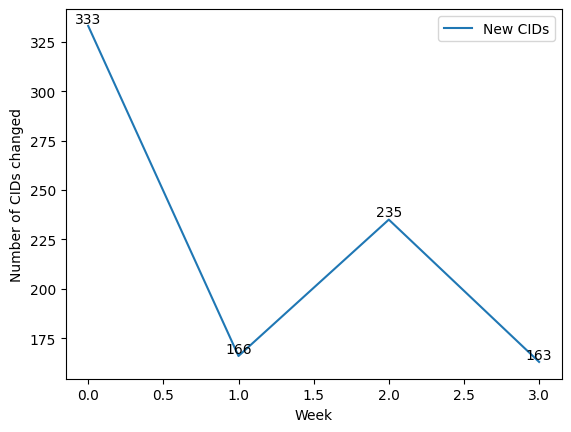

In [11]:
week_files = [f"../store/week{w}/time.csv" for w in range(2,5)]
week_files = [pd.read_csv(w) for w in week_files]
week_files[-1] = week_files[-1][:2441]

changes_in_peers = change_cid(df,week_files)
changes_in_peers = [333-c for c in changes_in_peers]
print(changes_in_peers)
pd.DataFrame({"Week":[0,1,2,3],"New CIDs":changes_in_peers}).set_index("Week").plot(ylabel="Number of CIDs changed")


for (xi, yi) in zip([0,1,2,3], changes_in_peers):
    plt.text(xi, yi, yi, va='bottom', ha='center')


[  0 167 178 213]


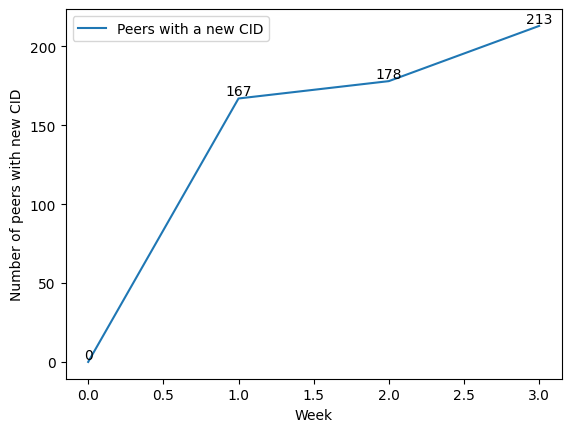

In [12]:

def change_peers_cids(init_set:pd.DataFrame, weeks:List[pd.DataFrame]) -> List[int]:
    result:List[int] = [0]
    observed_change = set()
    for week_df in weeks:
        merged_df = pd.merge(init_set, week_df, on='peer')
        merged_df['cid_y'] = merged_df['cid_y'].fillna('NONE')
        unequal_rows = merged_df[merged_df['cid_x'] != merged_df['cid_y']]
        unequal_rows = unequal_rows[~unequal_rows["peer"].isin(observed_change)]
        [observed_change.add(o) for o in unequal_rows['peer']]
        result.append(len(unequal_rows))
    return result


week_files = [f"../store/week{w}/time.csv" for w in range(2,5)]
week_files = [pd.read_csv(w) for w in week_files]

changes_in_peers = change_peers_cids(df,week_files)
changes_in_peers = [c for c in changes_in_peers]
changes_in_peers = np.cumsum(changes_in_peers)
pd.DataFrame({"Week":[0,1,2,3],"Peers with a new CID":changes_in_peers}).set_index("Week").plot(ylabel="Number of peers with new CID")

print(changes_in_peers)

for (xi, yi) in zip([0,1,2,3], changes_in_peers):
    plt.text(xi, yi, yi, va='bottom', ha='center')


if SAVE: 
    plt.savefig(SAVE_PATH+"change_in_cids_over_time.png",bbox_inches='tight')

[0.0, 0.5015015015015015, 0.5345345345345346, 0.6396396396396397]


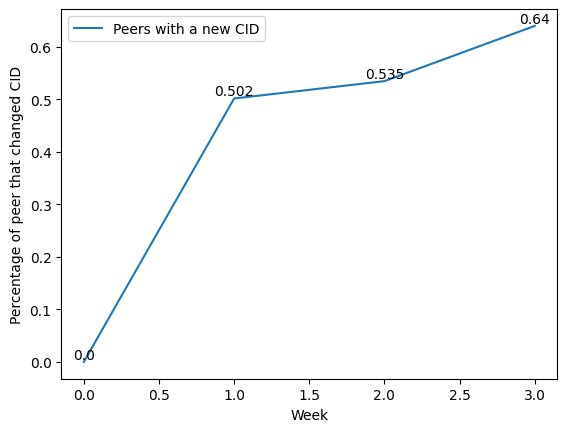

In [13]:


week_files = [f"../store/week{w}/time.csv" for w in range(2,5)]
week_files = [pd.read_csv(w) for w in week_files]

changes_in_peers = change_peers_cids(df,week_files)
changes_in_peers = [c for c in changes_in_peers]
changes_in_peers = np.cumsum(changes_in_peers)
#changes_in_peers = 333 - changes_in_peers
changes_in_peers = changes_in_peers.tolist()
changes_in_peers = [c/333 for c in changes_in_peers]
pd.DataFrame({"Week":[0,1,2,3],"Peers with a new CID":changes_in_peers}).set_index("Week").plot(ylabel="Percentage of peer that changed CID")

print(changes_in_peers)

for (xi, yi) in zip([0,1,2,3], [float("%.3f" % c) for c in changes_in_peers]):
    plt.text(xi, yi, yi, va='bottom', ha='center')

if SAVE: 
    plt.savefig(SAVE_PATH+"change_in_cids_over_time_perc.png",bbox_inches='tight')

[0.0, 0.5015015015015015, 0.5345345345345346, 0.6396396396396397]


/tmp/ipykernel_11528/3193886444.py:18: RuntimeWarning: invalid value encountered in log
  model = lambda x, a, b,c: a+b*np.log(c + x)


0.4862526301710284 + 0.11900266024197104*log(0.01681206517231577 + x)


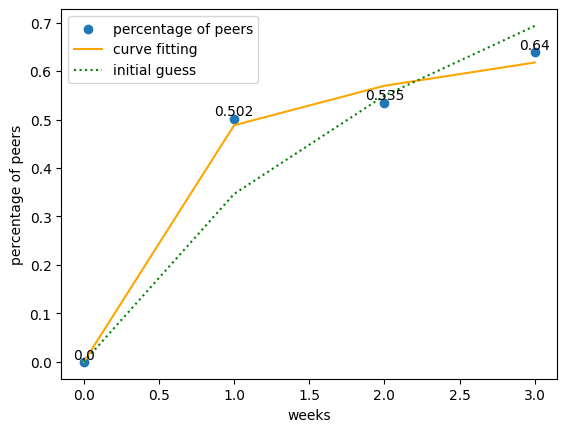

In [14]:
week_files = [f"../store/week{w}/time.csv" for w in range(2,5)]
week_files = [pd.read_csv(w) for w in week_files]

changes_in_peers = change_peers_cids(df,week_files)
changes_in_peers = [c for c in changes_in_peers]
changes_in_peers = np.cumsum(changes_in_peers)
#changes_in_peers = 333 - changes_in_peers
changes_in_peers = changes_in_peers.tolist()
changes_in_peers = [c/333 for c in changes_in_peers]
pd.DataFrame({"Week":[0,1,2,3],"Peers with a new CID":changes_in_peers}).set_index("Week")

print(changes_in_peers)


from scipy.optimize import curve_fit
import math

model = lambda x, a, b,c: a+b*np.log(c + x)
hypo = lambda x :  0.5*np.log(1 + x)
x_data = [0,1,2,3]
y_data = changes_in_peers


popt, pcov = curve_fit(model, x_data, y_data, p0=[0.0, 0.5, 1.0])

y_opt = [model(x, popt[0], popt[1], popt[2]) for x in x_data]
y_hypo = [hypo(x) for x in x_data]

fig, ax = plt.subplots()
ax.scatter(x_data, y_data,  marker="o", label="percentage of peers")
ax.plot(x_data, y_opt,  label="curve fitting",color="orange")
ax.plot(x_data, y_hypo,  linestyle="dotted", label="initial guess",color="green")
plt.ylabel("percentage of peers")
plt.xlabel("weeks")
plt.legend()


print(f"{popt[0]} + {popt[1]}*log({popt[2]} + x)")

for (xi, yi) in zip([0,1,2,3], [float("%.3f" % c) for c in changes_in_peers]):
    plt.text(xi, yi, yi, va='bottom', ha='center')


if SAVE: 
    plt.savefig(SAVE_PATH+"peers_rate_of_change_curve_fit.png",bbox_inches='tight')

In [15]:
from sklearn.metrics import r2_score

y_pred = [model(x, *popt) for x in x_data]
print("r^2 score: ",r2_score(y_data, y_pred))

r^2 score:  0.9922325499667257


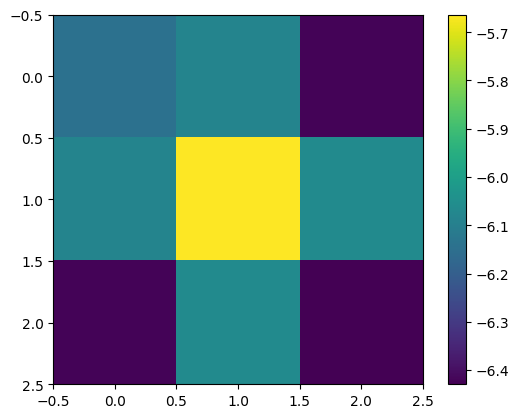

In [16]:

plt.imshow(np.log(np.abs(pcov)))
plt.colorbar()


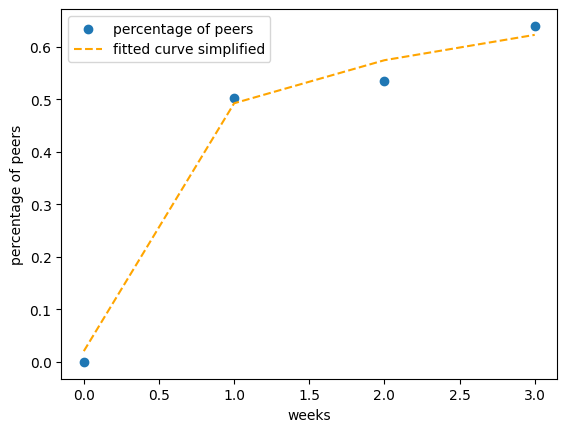

In [17]:
curve_fit_simple = lambda x : 0.49 + 0.12*np.log(0.02 + x)
y_fit_simple = [curve_fit_simple(x) for x in x_data]
fig, ax = plt.subplots()
ax.scatter(x_data, y_data,  marker="o", label="percentage of peers")
ax.plot(x_data, y_fit_simple,  linestyle="dashed", label="fitted curve simplified",color="orange")
plt.ylabel("percentage of peers")
plt.xlabel("weeks")
plt.legend()

[1.0, 0.4984984984984985, 0.46546546546546547, 0.36036036036036034]


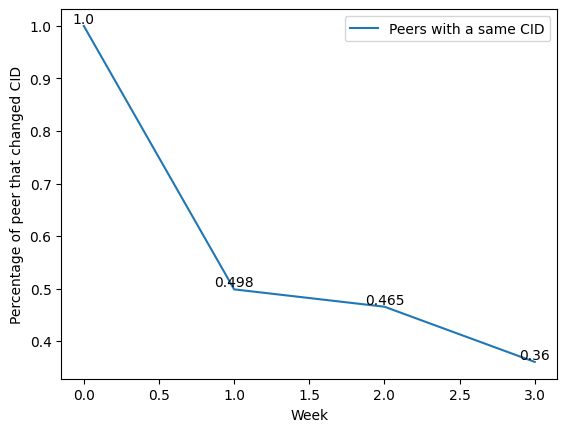

In [21]:
week_files = [f"../store/week{w}/time.csv" for w in range(2,5)]
week_files = [pd.read_csv(w) for w in week_files]

changes_in_peers = change_peers_cids(df,week_files)
changes_in_peers = [c for c in changes_in_peers]
changes_in_peers = np.cumsum(changes_in_peers)
changes_in_peers = 333 - changes_in_peers
changes_in_peers = changes_in_peers.tolist()
changes_in_peers = [c/333 for c in changes_in_peers]
pd.DataFrame({"Week":[0,1,2,3],"Peers with a same CID":changes_in_peers}).set_index("Week").plot(ylabel="Percentage of peer that changed CID")

print(changes_in_peers)

for (xi, yi) in zip([0,1,2,3], [float("%.3f" % c) for c in changes_in_peers]):
    plt.text(xi, yi, yi, va='bottom', ha='center')


[  0 167 192 301]


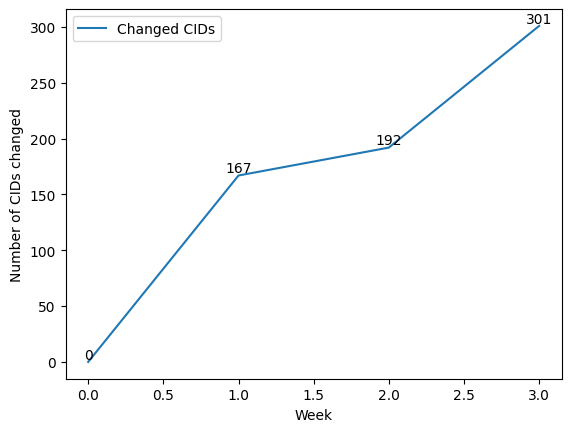

In [ ]:

def change_in_cids(init_set:pd.DataFrame, weeks:List[pd.DataFrame]) -> List[int]:
    result:List[int] = [0]
    observed_change = set()
    for week_df in weeks:
        merged_df = pd.merge(init_set, week_df, on='peer')
        merged_df['cid_y'] = merged_df['cid_y'].fillna('NONE')
        unequal_rows = merged_df[merged_df['cid_x'] != merged_df['cid_y']]
        unequal_rows = unequal_rows[~unequal_rows["cid_y"].isin(observed_change)]
        [observed_change.add(o) for o in unequal_rows['cid_y']]
        result.append(len(unequal_rows))
    return result


week_files = [f"../store/week{w}/time.csv" for w in range(2,5)]
week_files = [pd.read_csv(w) for w in week_files]

changes_in_peers = change_in_cids(df,week_files)
changes_in_peers = [c for c in changes_in_peers]
changes_in_peers = np.cumsum(changes_in_peers)
pd.DataFrame({"Week":[0,1,2,3],"Changed CIDs":changes_in_peers}).set_index("Week").plot(ylabel="Number of CIDs changed")

print(changes_in_peers)

for (xi, yi) in zip([0,1,2,3], changes_in_peers):
    plt.text(xi, yi, yi, va='bottom', ha='center')

[0.0, 0.5015015015015015, 0.5765765765765766, 0.9039039039039038]


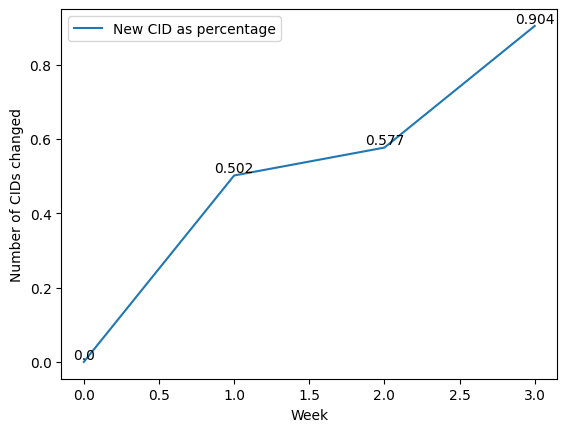

In [ ]:

week_files = [f"../store/week{w}/time.csv" for w in range(2,5)]
week_files = [pd.read_csv(w) for w in week_files]


changes_in_peers = change_in_cids(df,week_files)
changes_in_peers = [c for c in changes_in_peers]
changes_in_peers = np.cumsum(changes_in_peers)
#changes_in_peers = 333 - changes_in_peers
changes_in_peers = changes_in_peers.tolist()
changes_in_peers = [c/333 for c in changes_in_peers]
pd.DataFrame({"Week":[0,1,2,3],"New CID as percentage":changes_in_peers}).set_index("Week").plot(ylabel="Number of CIDs changed")

print(changes_in_peers)

for (xi, yi) in zip([0,1,2,3], [float("%.3f" % c) for c in changes_in_peers]):
    plt.text(xi, yi, yi, va='bottom', ha='center')

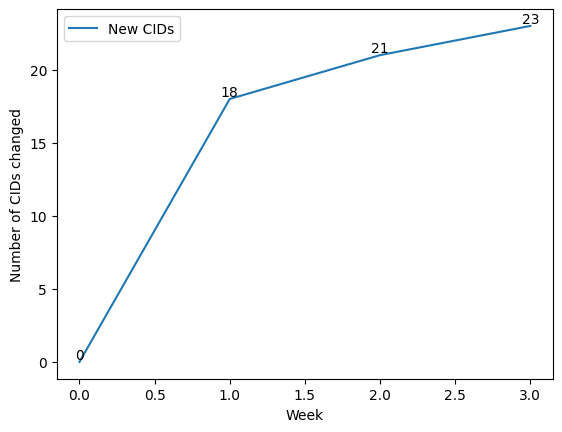

In [ ]:
def change_cid_consistent(init_set:pd.DataFrame, weeks:List[pd.DataFrame]) -> List[int]:
    init_set.fillna("NONE")
    init_set = drop_none_unique_peers(init_set)
    init_set.to_clipboard()
    weeks_list = []
    for week_df in weeks:
        merged_df = pd.merge(init_set, week_df, on='peer')
        merged_df['cid_y'] = merged_df['cid_y'].fillna('NONE')
        unequal_rows = merged_df[merged_df['cid_x'] != merged_df['cid_y']]
        weeks_list.append(unequal_rows)
    last_weeks_peers = init_set["peer"].to_list()
    for i, week in enumerate(weeks_list):
        weeks_list[i] = week[week["peer"].isin(last_weeks_peers)]
        last_weeks_peers = weeks_list[i]["peer"].to_list()
    return [0] + [len(w) for w in weeks_list]



week_files = [f"../store/week{w}/time.csv" for w in range(2,5)]
week_files = [pd.read_csv(w) for w in week_files]

changes_in_peers = change_cid_consistent(df,week_files)
changes_in_peers = [c for c in changes_in_peers]
changes_in_peers = np.cumsum(changes_in_peers)
pd.DataFrame({"Week":[0,1,2,3],"New CIDs":changes_in_peers}).set_index("Week").plot(ylabel="Number of CIDs changed")


for (xi, yi) in zip([0,1,2,3], changes_in_peers):
    plt.text(xi, yi, yi, va='bottom', ha='center')

if SAVE: 
    plt.savefig(SAVE_PATH+"unequal_cid_over_time_constant_peer_set.png",bbox_inches='tight')

peers in weeks [2611, 1591, 1724]
changes [0, 902, 902, 902]


<Axes: xlabel='Week', ylabel='Number of CIDs changed'>

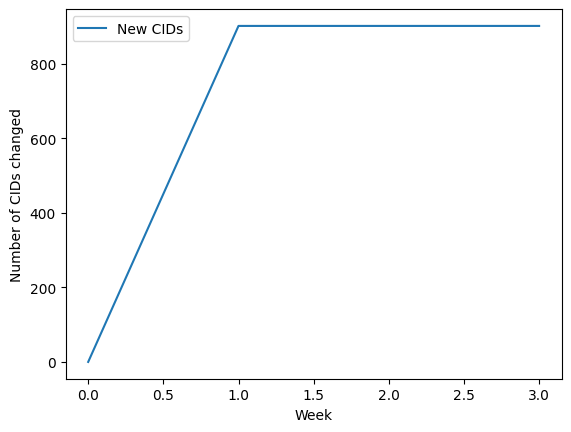

In [ ]:
from datetime import timedelta
window = []
number_of_peers = []
for w in week_files:
    w['time'] = pd.to_datetime(w['time'])

    d = timedelta(hours=24)
    w = w[w['time'] < w['time'][0] + d]
    number_of_peers.append(len(w))
    window.append(df)
print("peers in weeks",number_of_peers)

changes_in_peers = change_cid(df,window)
print("changes",changes_in_peers)
pd.DataFrame({"Week":[0,1,2,3],"New CIDs":changes_in_peers}).set_index("Week").plot(ylabel="Number of CIDs changed")